# Electromyography and Gradient Boosting 

In this assignment I applied the Gradient Boosting ensemble prediction method I learned about in class with sklearn methods.

## Background and Documentation

Make sure you go through [this](https://explained.ai/gradient-boosting/),  [this](https://www.kaggle.com/code/kashnitsky/topic-10-gradient-boosting/notebook) and [this](https://www.gormanalysis.com/blog/gradient-boosting-explained/) excellent writeups. Summarise the technique including the equations in a markdown file or notebook. 

**Technique Summary:**

The key of gradient boosting is that it is a model that utilizes weak learners, that while functional, tend to not be very accurate, and uses them additively to create a much more accurate model.  It is a non parametric method.  It does not look back at past inaccurate iterations of the model and changes them.  Instead, gradient boosting uses previous models to add to the success of future iterations of the model.  Any kind of weak learner can be used for gradient boosting, but trees are used very often, and are used in the implementation below with sklearn.  So let's say we have a weak learner which is a decision tree $g(x,\theta)$

To create a model that is as accurate as it can be, the goal is to minimize loss.  So a loss function that is differentiable must be used.  The purpose of this is that the negative gradient of the loss function will point in the direction of the minimum loss.  With gradient boosting, we want to cultivate a tree that will accurately model the negative gradient of the loss function to find the least loss.

The idea of gradient boosting is the following:

1. Initialize regression tree $g(x)$
2. For $j = 1$ to the number of boost stages $M$:
  * Calculate the residual, which is the negative gradient of the loss function $r_{ij}=-\frac{\partial L(y_i,\hat{y}_i^{j-1})}{\partial \hat{y}_i^{j-1}}$ where $\hat{y}_i$ is the predicted $y$ value and $y_i$ is the actual $y$ value.
  * Fit our predictor $g(x)$ to the residual $r_{ij}$ to get $\hat{y}^{j-1}$.  (We want to do this because as mentioned earlier, our negative gradient will point towards the least loss, which is our most accurate solution.)
  * Update our predictor $g(x)$ with: $g_j(x)=g_{j-1}(x)+n\hat{y}^{j-1}$ where n is our learning rate.

3. Return the final boosted regression tree $g_M(x)$

## Application on Cosinusoidal Dataset

Below, I applied sklearn gradient boosting using the clipped cosinusoidal dataset for [the classification task](https://www.kaggle.com/code/kashnitsky/topic-10-gradient-boosting?scriptVersionId=37852307&cellId=15) mentioned here.
![](https://pantelis.github.io/data-science/_images/clipped-cos-dataset.png)

Cosinusoidal dataset:
$\large y = cos(x) + \epsilon, \epsilon \sim \mathcal{N}(0, \frac{1}{5}), x \in [-5,5]$

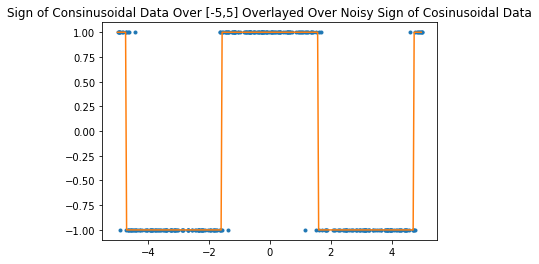

Learning rate:  0.1
Accuracy score with training data: 0.937
Accuracy score with testing data: 0.960


In [ ]:
import numpy as np
import os
import random
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler

###
# First generate cosinusoidal dataset
###

x = []
x_val = np.arange(-5,5,10.0/300.0)


for _ in range(300):
  x.append(-5 + random.random()*10)

x = np.array(x)

y = []
y_val = []

for i in range(len(x)):
  err = random.gauss(0, 1.0/5.0)
  cosi = math.cos(x[i])+err
  y.append(cosi)
  y_val.append(math.cos(x_val[i]))

y = np.sign(np.array(y))
y_val = np.sign(np.array(y_val))


###
# Plot the dataset. For fun :-)
###
plt.plot(x,y, '.')
plt.plot(x_val, y_val)
plt.title("Sign of Consinusoidal Data Over [-5,5] Overlayed Over Noisy Sign of Cosinusoidal Data")
plt.show()


###
# Use sklearn gradient boost!
###
x = x.reshape(-1,1)
x_val = x_val.reshape(-1,1)

learning_rate = 0.1
gb = GradientBoostingClassifier(n_estimators=3, learning_rate=learning_rate, max_depth=2)
gb.fit(x, y)

print("Learning rate: ", learning_rate)
print("Accuracy score with training data: {0:.3f}".format(gb.score(x, y)))
print("Accuracy score with testing data: {0:.3f}".format(gb.score(x_val, y_val)))



## EMG Dataset


Below I applied gradient boosting implementation to the [EMG dataset](https://archive.ics.uci.edu/ml/datasets/EMG+Physical+Action+Data+Set) shown here to classify either aggressive (1) or non aggressive (0) actions.  I also tried out sets of different learning rates and n_estimators to find which one would create the best accuracy.

In [ ]:
# Mount google drive so that I can get the data from it
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler



###
# Import dataset.  I uploaded it to drive and imported it from there, so I'm
# unsure how it'll work when used by someone else.
###
path = '/content/drive/My Drive/dataset'
%cd '/content/drive/My Drive/dataset'

# Set aside which files have aggressive[1] actions and which have nonaggressive[0] actions.
aggro = ['Slapping.txt', 'Sidekicking.txt', 'Pushing.txt', 'Punching.txt', 'Pulling.txt', 'Kneeing.txt', 'Headering.txt', 'Hamering.txt', 'Frontkicking.txt', 'Elbowing.txt']
non = ['Waving.txt', 'Walking.txt', 'Running.txt', 'Standing.txt', 'Jumping.txt', 'Hugging.txt', 'Handshaking.txt', 'Seating.txt', 'Bowing.txt', 'Clapping.txt']

aggroDat = np.loadtxt(aggro[0])
nonDat = np.loadtxt(non[0])

# Combine the data into two separate arrays, one for the aggressive actions, one for the nonaggressive actions
for i in range(len(aggro)):
  if i == 0:
    continue
  aDat = np.loadtxt(aggro[i])
  nDat = np.loadtxt(non[i])
  aggroDat = np.concatenate((aggroDat, aDat))
  nonDat = np.concatenate((nonDat, nDat))

%cd "/content/"

ay = [1]*aggroDat.shape[0]
ny = [0]*nonDat.shape[0]

# Split into training and test data
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(aggroDat, ay, test_size = 0.2, random_state = 4)
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(nonDat, ny, test_size = 0.2, random_state = 4)


# Combine the 0 and 1 training and testing sets into one training and one testing set
X_train = np.vstack((X_train_a,X_train_n))
X_test = np.vstack((X_test_a,X_test_n))
y_train = np.hstack((y_train_a,y_train_n))
y_test = np.hstack((y_test_a,y_test_n))


# Run the traning and testing sets in the through the gradient booster

rates = np.arange(0.1, 1, 0.05).tolist()
estims = np.arange(100, 300, 5).tolist()

best_est = estims[0]
best_rate = rates[0]

for rate in rates:
  gb = GradientBoostingClassifier(n_estimators=100, learning_rate=rate)
  gb.fit(X_train, y_train)
  
  print("Learning rate: ", rate)
  print("Accuracy score with training data: {0:.3f}".format(gb.score(X_train, y_train)))
  print("Accuracy score with testing data: {0:.3f}".format(gb.score(X_test, y_test)))
  if rate == rates[0]:
    my_score = (gb.score(X_train, y_train)+gb.score(X_test, y_test))/2.0
    best_rate = rate
    continue
  if (gb.score(X_train, y_train)+gb.score(X_test, y_test))/2 > my_score:
    my_score = (gb.score(X_train, y_train)+gb.score(X_test, y_test))/2.0
    best_rate = rate

for estim in estims:
  gb = GradientBoostingClassifier(n_estimators=estim, learning_rate=best_rate)
  gb.fit(X_train, y_train)
  
  print("n_estimators: ", estim)
  print("Accuracy score with training data: {0:.3f}".format(gb.score(X_train, y_train)))
  print("Accuracy score with testing data: {0:.3f}".format(gb.score(X_test, y_test)))
  if estim == estims[0]:
    my_score = (gb.score(X_train, y_train)+gb.score(X_test, y_test))/2.0
    best_est = estim
    continue
  if (gb.score(X_train, y_train)+gb.score(X_test, y_test))/2 > my_score:
    my_score = (gb.score(X_train, y_train)+gb.score(X_test, y_test))/2.0
    best_est = estim

print("Best learning rate: ", best_rate)
print("Best n_estimators: ", best_est)
print("Accuracy score with training data: {0:.3f}".format(gb.score(X_train, y_train)))
print("Accuracy score with testing data: {0:.3f}".format(gb.score(X_test, y_test)))


/content/drive/My Drive/dataset
/content
Learning rate:  0.1
Accuracy score with training data: 0.888
Accuracy score with testing data: 0.885
Learning rate:  0.15000000000000002
Accuracy score with training data: 0.891
Accuracy score with testing data: 0.888
Learning rate:  0.20000000000000004
Accuracy score with training data: 0.893
Accuracy score with testing data: 0.890
Learning rate:  0.25000000000000006
Accuracy score with training data: 0.894
Accuracy score with testing data: 0.891
Learning rate:  0.30000000000000004
Accuracy score with training data: 0.896
Accuracy score with testing data: 0.892
Learning rate:  0.3500000000000001
Accuracy score with training data: 0.897
Accuracy score with testing data: 0.892
Learning rate:  0.40000000000000013
Accuracy score with training data: 0.898
Accuracy score with testing data: 0.894
Learning rate:  0.45000000000000007
Accuracy score with training data: 0.900
Accuracy score with testing data: 0.894
Learning rate:  0.5000000000000001
Accur